# Linear-Regression
$\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

## Step 1. Create a DataSet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

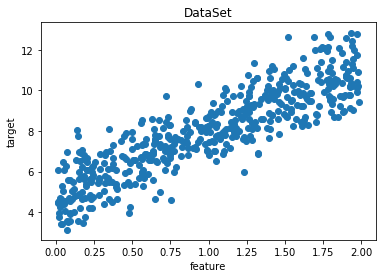

In [2]:
# create 500 points
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure()
plt.scatter(X, y)
plt.title("DataSet")
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [3]:
X.shape

(500, 1)

## Step 2. buila a model
loss funtion(mean square loss):
$J(\boldsymbol{w},b) = \frac{1}{2m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

$ \frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$

The gradient containing all partial derivatives can then be computed as follows:

$\nabla_{\boldsymbol{w}} J = \frac{1}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

$\nabla_{\boldsymbol{b}} J = \frac{1}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

In [4]:
class LinearRegression:
    def __init__(self,):
        pass
    
    def train(self, X, y, learning_rate, n_iters=50):
        # initial W and b
        nums, n_features = X.shape
        self.weights = np.zeros((n_features ,1))
        self.bias = 0.
        
        Loss = []  # store the loss
        
        # train
        for i in range(n_iters):
            # predict the target value
            y_pred = np.dot(X, self.weights) + self.bias
            
            # compute the loss (mean square loss)
            loss = (1 / 2*nums) * np.sum((y_pred - y)**2)
            Loss.append(loss)
            
            # optimize weights and bias in using gradient descent
            dJ_dw = (1 / nums) * np.sum(np.dot(X.T, y_pred - y))
            dJ_db = (1 / nums) * np.sum(y_pred - y)
            
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db
            
            if i % 20 == 0:
                print('[INFO] iteration {} : {}'.format(i, loss))
        return self.weights, self.bias, Loss
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Step 3. train the model

In [5]:
LR = LinearRegression()
W, b, loss = LR.train(X, y, learning_rate=0.01, n_iters=600)

[INFO] iteration 0 : 8555880.27177651
[INFO] iteration 20 : 3638399.665536376
[INFO] iteration 40 : 1606335.9650240336
[INFO] iteration 60 : 765548.6810570502
[INFO] iteration 80 : 416660.7924383911
[INFO] iteration 100 : 270950.4029438898
[INFO] iteration 120 : 209221.24249519993
[INFO] iteration 140 : 182260.4403909651
[INFO] iteration 160 : 169745.8394258805
[INFO] iteration 180 : 163282.23715607822
[INFO] iteration 200 : 159398.4441604897
[INFO] iteration 220 : 156656.33186219097
[INFO] iteration 240 : 154457.37829427572
[INFO] iteration 260 : 152549.9701333944
[INFO] iteration 280 : 150825.98966594943
[INFO] iteration 300 : 149236.82451592406
[INFO] iteration 320 : 147758.67817847786
[INFO] iteration 340 : 146378.2337985111
[INFO] iteration 360 : 145086.72110087803
[INFO] iteration 380 : 143877.4532154291
[INFO] iteration 400 : 142744.79680878215
[INFO] iteration 420 : 141683.7347306204
[INFO] iteration 440 : 140689.67402988978
[INFO] iteration 460 : 139758.35598532524
[INFO] iter

In [6]:
y_predict = np.dot(X, W) + b

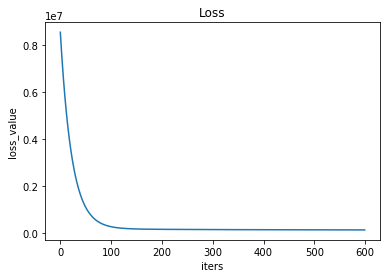

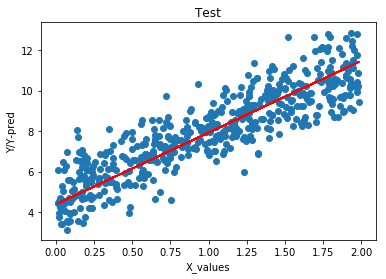

In [7]:
# plot the result and loss
plt.figure()
plt.plot(range(0, 600), loss)
plt.title("Loss")
plt.ylabel('loss_value')
plt.xlabel('iters')
plt.figure()
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
plt.title("Test")
plt.xlabel("X_values")
plt.ylabel("Y/Y-pred")
plt.show()